In [59]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pathlib import Path
from libs import customplots as cplot
from libs.utils import round_sig_figs

In [60]:
summary = pd.read_csv('data/pliocene_summary.csv')
summary

,Unnamed: 0,expNum,gamma0,UMV,LRP,PDDi,WeertC,model,Pliocene,Control,Plio_minus_ctrl
0,0,1,9618.882299,2.060000e+20,0.000716,0.019590,22300.78404,cosmos,6.225787,3.967440,2.258347
1,1,2,159188.541400,7.970000e+20,0.000527,0.016819,13110.00177,cosmos,16.312585,11.810203,4.502383
2,2,3,159188.541400,2.370000e+19,0.000396,0.011979,16585.21943,cosmos,10.733773,7.002231,3.731542
3,3,4,471264.291700,6.490000e+20,0.000662,0.013550,31568.73903,cosmos,6.058107,-4.300125,10.358232
4,4,5,159188.541400,3.210000e+20,0.000102,0.018149,39836.39122,cosmos,-4.943914,-9.267447,4.323533
...,...,...,...,...,...,...,...,...,...,...,...
115,115,116,471264.291700,2.150000e+20,0.000667,0.016084,12164.39133,hadcm3,NaN,12.714530,NaN
116,116,117,21005.343640,9.570000e+20,0.000597,0.012239,28079.55828,hadcm3,1.566160,0.226333,1.339827
117,117,118,9618.882299,9.250000e+20,0.000039,0.009879,22846.37812,hadcm3,1.127536,3.678539,-2.551003
118,118,119,21005.343640,3.120000e+20,0.000743,0.012031,51296.82688,hadcm3,-2.916010,-7.500984,4.584974


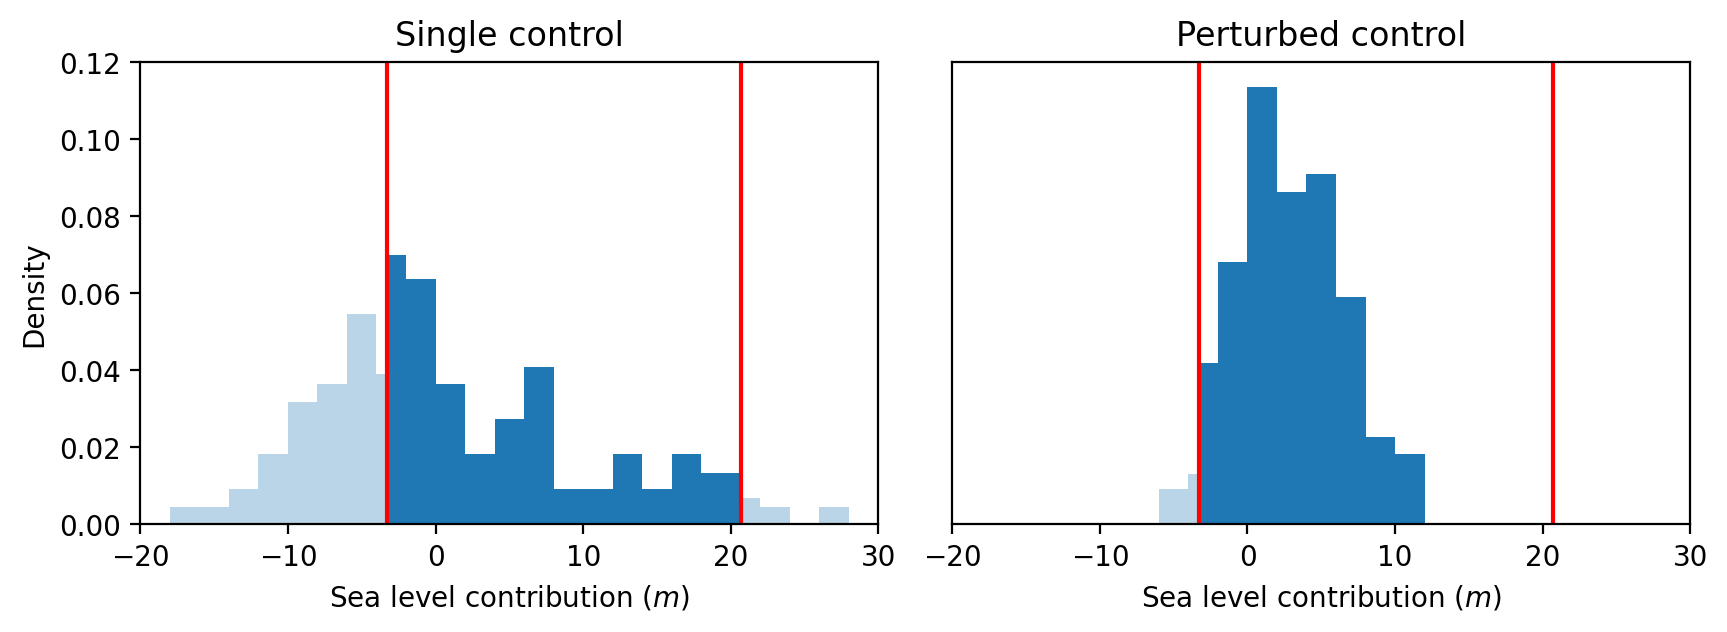

In [61]:
fig, (ax1, ax2) = plt.subplots(ncols=2, dpi=200, figsize=(10, 3))

plt.rc('font', size=10)

def plot_hist(data, ax):


    bins = [-20, -18, -16, -14, -12, -10, -8, -6, -4, -3.3, -2, 0, 2, 4,\
         6, 8, 10, 12, 14, 16, 18, 20.7, 22, 24, 26, 28]

    n, bins, patches = ax.hist(data, bins=bins, color=None, ec=None, lw=0.2, density=True, alpha=1)

    # Set alpha conditionally for bars with x coordinate less than -3
    for i in range(len(bins)-1):
        if bins[i] < -3.3 or bins[i+1]>20.7:
            patches[i].set_alpha(0.3)

    #summary['Plio_minus_ctrl'].plot.kde(color='black', label='Uncalibrated', alpha=0.2)
    #summary[summary['Plio_minus_ctrl']>-3]['Plio_minus_ctrl'].plot.kde(color='black', label='Calibrated')

    #ax.legend(loc = 'upper left')
    #ax.get_yaxis().set_visible(False)
    ax.set_xlim(-20, 30)
    ax.set_ylim(0, 0.12)

    ax.vlines(-3.3, 0, 0.12, color='red')
    ax.vlines(20.7, 0, 0.12, color='red')

    ax.set_xlabel('Sea level contribution ($m$)')

#cplot.save(fig, name='pliominusctrl')

plot_hist(summary['Pliocene'], ax1)
plot_hist(summary['Plio_minus_ctrl'], ax2)

ax2.set_yticks([])
ax1.set_ylabel('Density')

ax1.set_title('Single control')
ax2.set_title('Perturbed control')

plt.subplots_adjust(wspace=0.1)
